In [46]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, plot_confusion_matrix, roc_curve, classification_report, log_loss
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import pickle

In [2]:
data = pd.read_csv('weatherAUS.csv')

In [3]:
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   
3  2008-12-04   Albury      9.2     28.0       0.0          NaN       NaN   
4  2008-12-05   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [5]:
data.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  143975.000000  144199.000000  142199.000000  82670.000000   
mean       12.194034      23.221348       2.360918      5.468232   
std         6.398495       7.119049       8.478060      4.193704   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.900000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  75625.000000  135197.000000  143693.000000  142398.000000   
mean       7.611178      40.035230      14.043426      18.662657   
std        3.785483      13.607062       8.915375       8.809800   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.800000      31.000000       7.000000      13.000000   
50%        8.400000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm   Pressure9am    Pressure3pm  \
count  142806.000000  140953.000000  130395.00000  130432.000000   
mean       68.880831      51.539116    1017.64994    1015.255889   
std        19.029164      20.795902       7.10653       7.037414   
min         0.000000       0.000000     980.50000     977.100000   
25%        57.000000      37.000000    1012.90000    1010.400000   
50%        70.000000      52.000000    1017.60000    1015.200000   
75%        83.000000      66.000000    1022.40000    1020.000000   
max       100.000000     100.000000    1041.00000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am       Temp3pm  
count  89572.000000  86102.000000  143693.000000  141851.00000  
mean       4.447461      4.509930      16.990631      21.68339  
std        2.887159      2.720357       6.488753       6.93665  
min        0.000000      0.000000      -7.200000      -5.40000  
25%        1.000000      2.000000      12.300000      16.60000  
50%        5.000000      5.000000      16.700000      21.10000  
75%        7.000000      7.000000      21.600000      26.40000  
max        9.000000      9.000000      40.200000      46.70000

In [6]:
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': data.columns,'percent_missing': percent_missing})
missing_value_df.sort_values('percent_missing', inplace=True, ascending= False)
missing_value_df

column_name  percent_missing
Sunshine            Sunshine        48.009762
Evaporation      Evaporation        43.166506
Cloud3pm            Cloud3pm        40.807095
Cloud9am            Cloud9am        38.421559
Pressure9am      Pressure9am        10.356799
Pressure3pm      Pressure3pm        10.331363
WindDir9am        WindDir9am         7.263853
WindGustDir      WindGustDir         7.098859
WindGustSpeed  WindGustSpeed         7.055548
Humidity3pm      Humidity3pm         3.098446
WindDir3pm        WindDir3pm         2.906641
Temp3pm              Temp3pm         2.481094
RainTomorrow    RainTomorrow         2.245978
Rainfall            Rainfall         2.241853
RainToday          RainToday         2.241853
WindSpeed3pm    WindSpeed3pm         2.105046
Humidity9am      Humidity9am         1.824557
Temp9am              Temp9am         1.214767
WindSpeed9am    WindSpeed9am         1.214767
MinTemp              MinTemp         1.020899
MaxTemp              MaxTemp         0.866905
Location            Location         0.000000
Date                    Date         0.000000

In [7]:
def unique_values(df):
    for col in df:
        if data.dtypes[col] == 'O':
            print('Column name: ', df[col].name)
            print(pd.value_counts(df[col]))

In [8]:
unique_values(data)

Column name:  Date
2013-11-13    49
2014-06-18    49
2016-01-12    49
2016-05-22    49
2013-04-10    49
              ..
2007-12-02     1
2007-11-14     1
2007-12-15     1
2007-12-01     1
2007-11-12     1
Name: Date, Length: 3436, dtype: int64
Column name:  Location
Canberra            3436
Sydney              3344
Darwin              3193
Perth               3193
Brisbane            3193
Melbourne           3193
Hobart              3193
Adelaide            3193
Townsville          3040
Albury              3040
MountGinini         3040
Albany              3040
Ballarat            3040
Cairns              3040
Bendigo             3040
Wollongong          3040
AliceSprings        3040
Launceston          3040
GoldCoast           3040
MountGambier        3040
Tuggeranong         3039
Penrith             3039
Newcastle           3039
Sale                3009
Dartmoor            3009
Woomera             3009
Witchcliffe         3009
Mildura             3009
BadgerysCreek       3009
SydneyA

In [9]:
def count_plotter(df):
    for col in df:
        if data.dtypes[col] == 'O':
            plt.figure(figsize=(20, 10))
            sns.countplot(df[col], palette = 'Blues')
            plt.show()

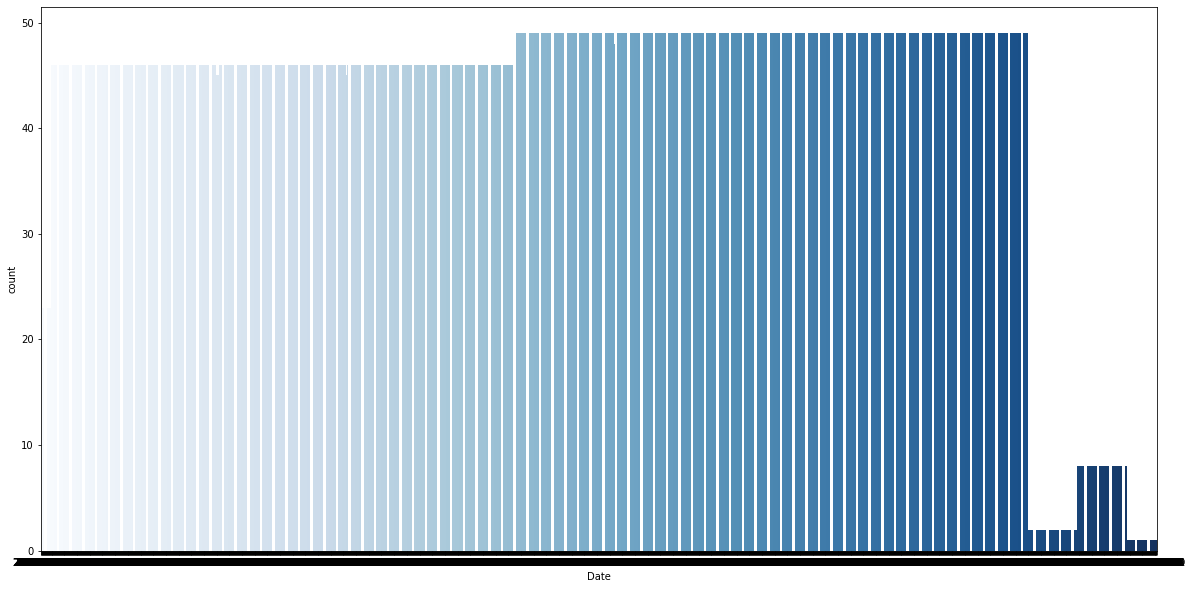

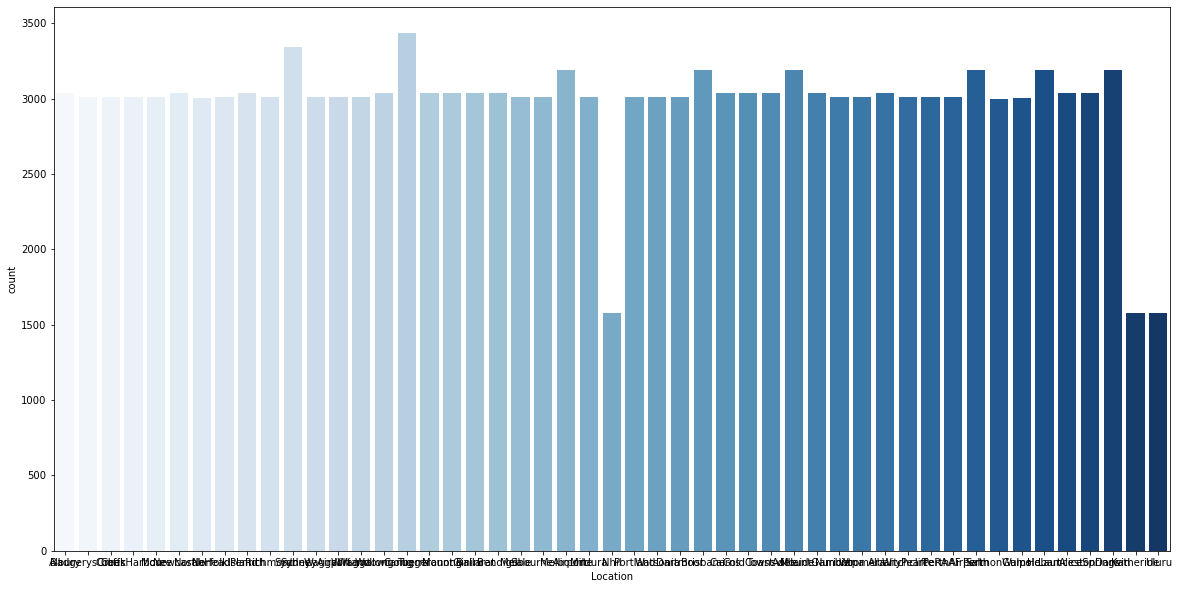

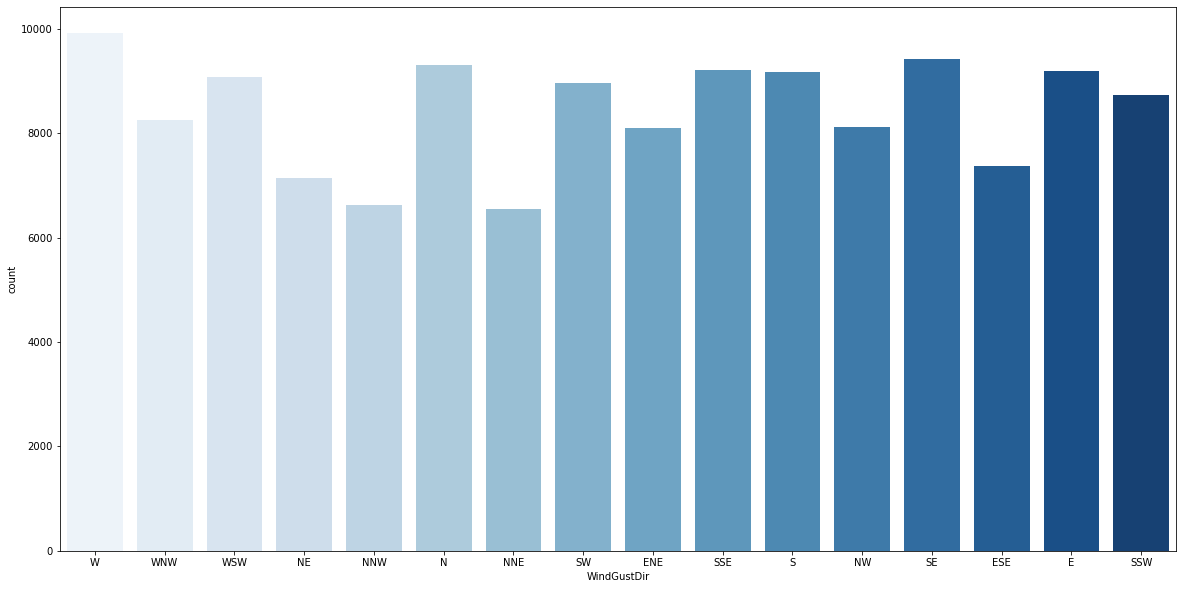

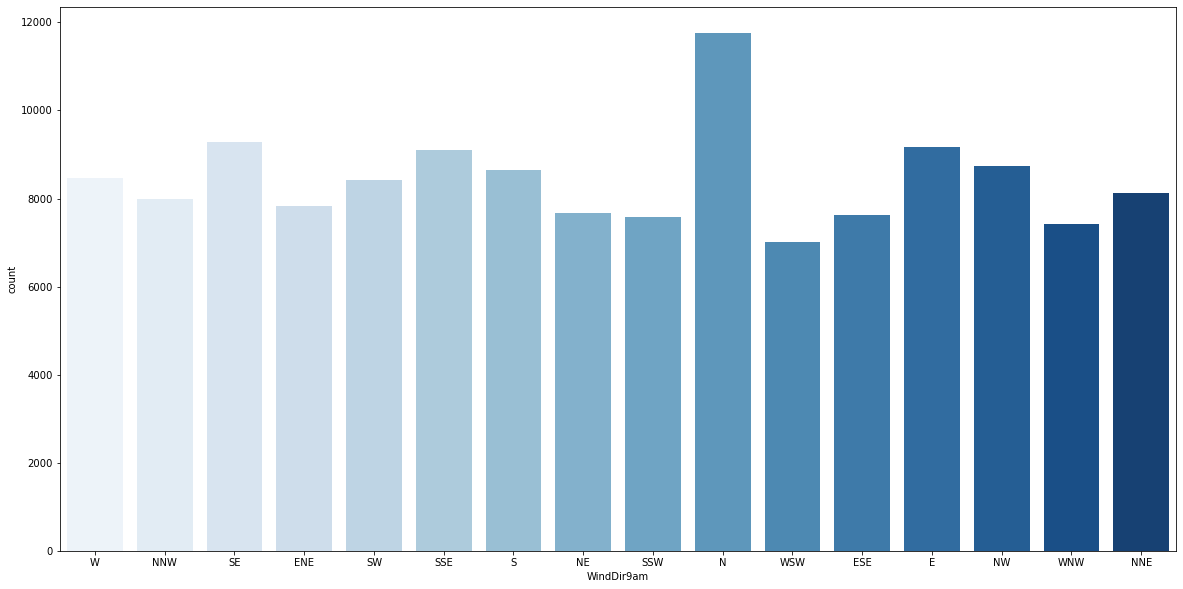

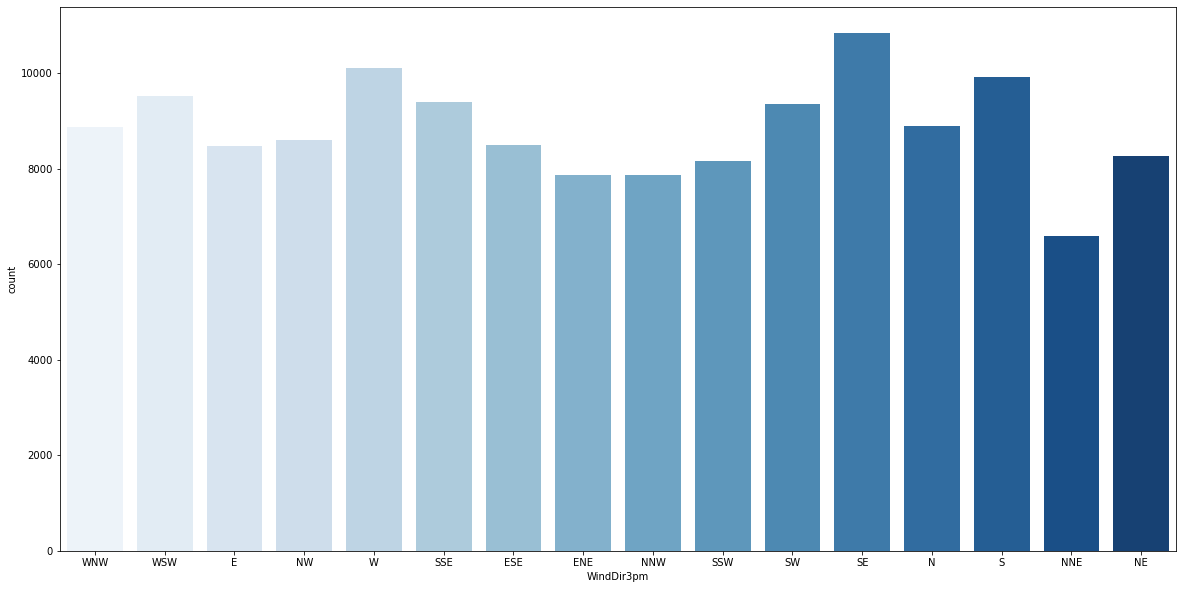

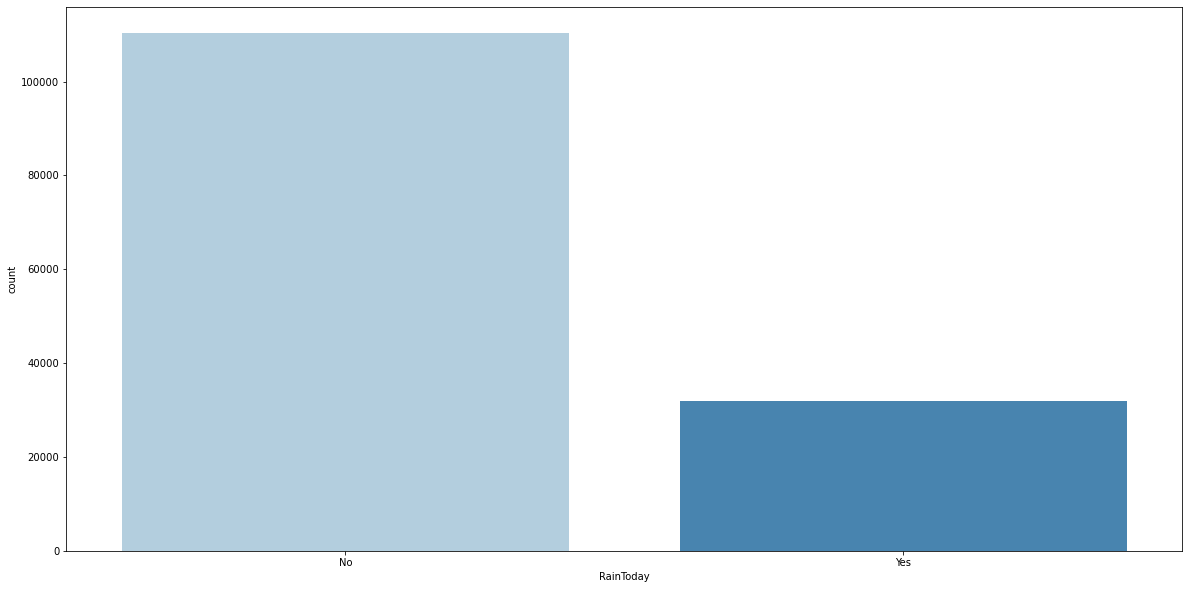

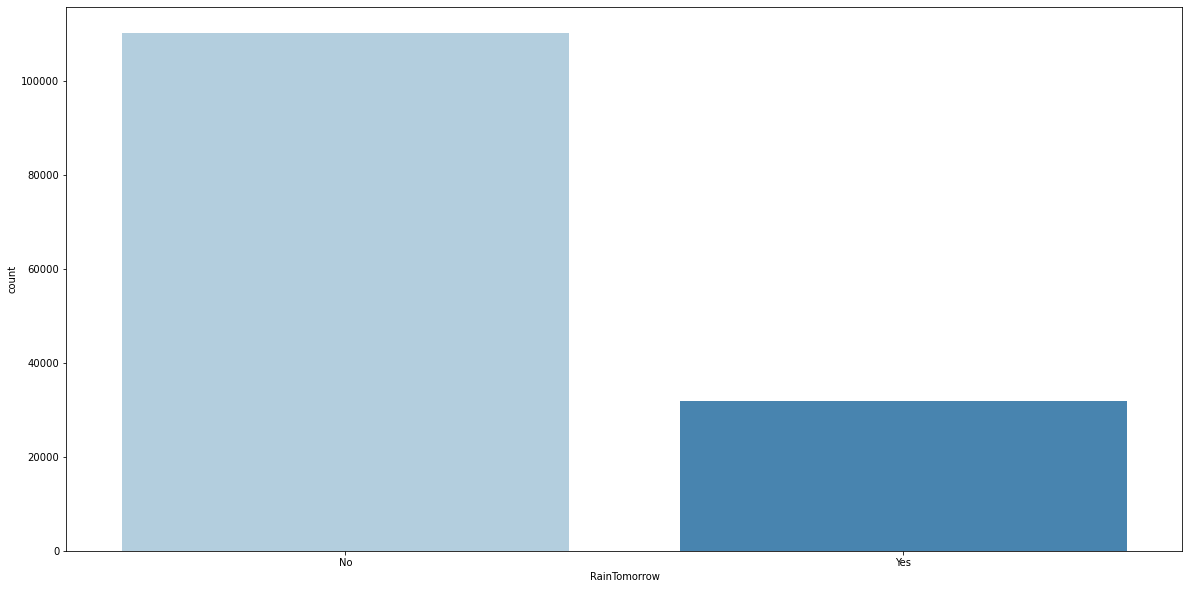

In [10]:
count_plotter(data)

<AxesSubplot:xlabel='count', ylabel='Location'>

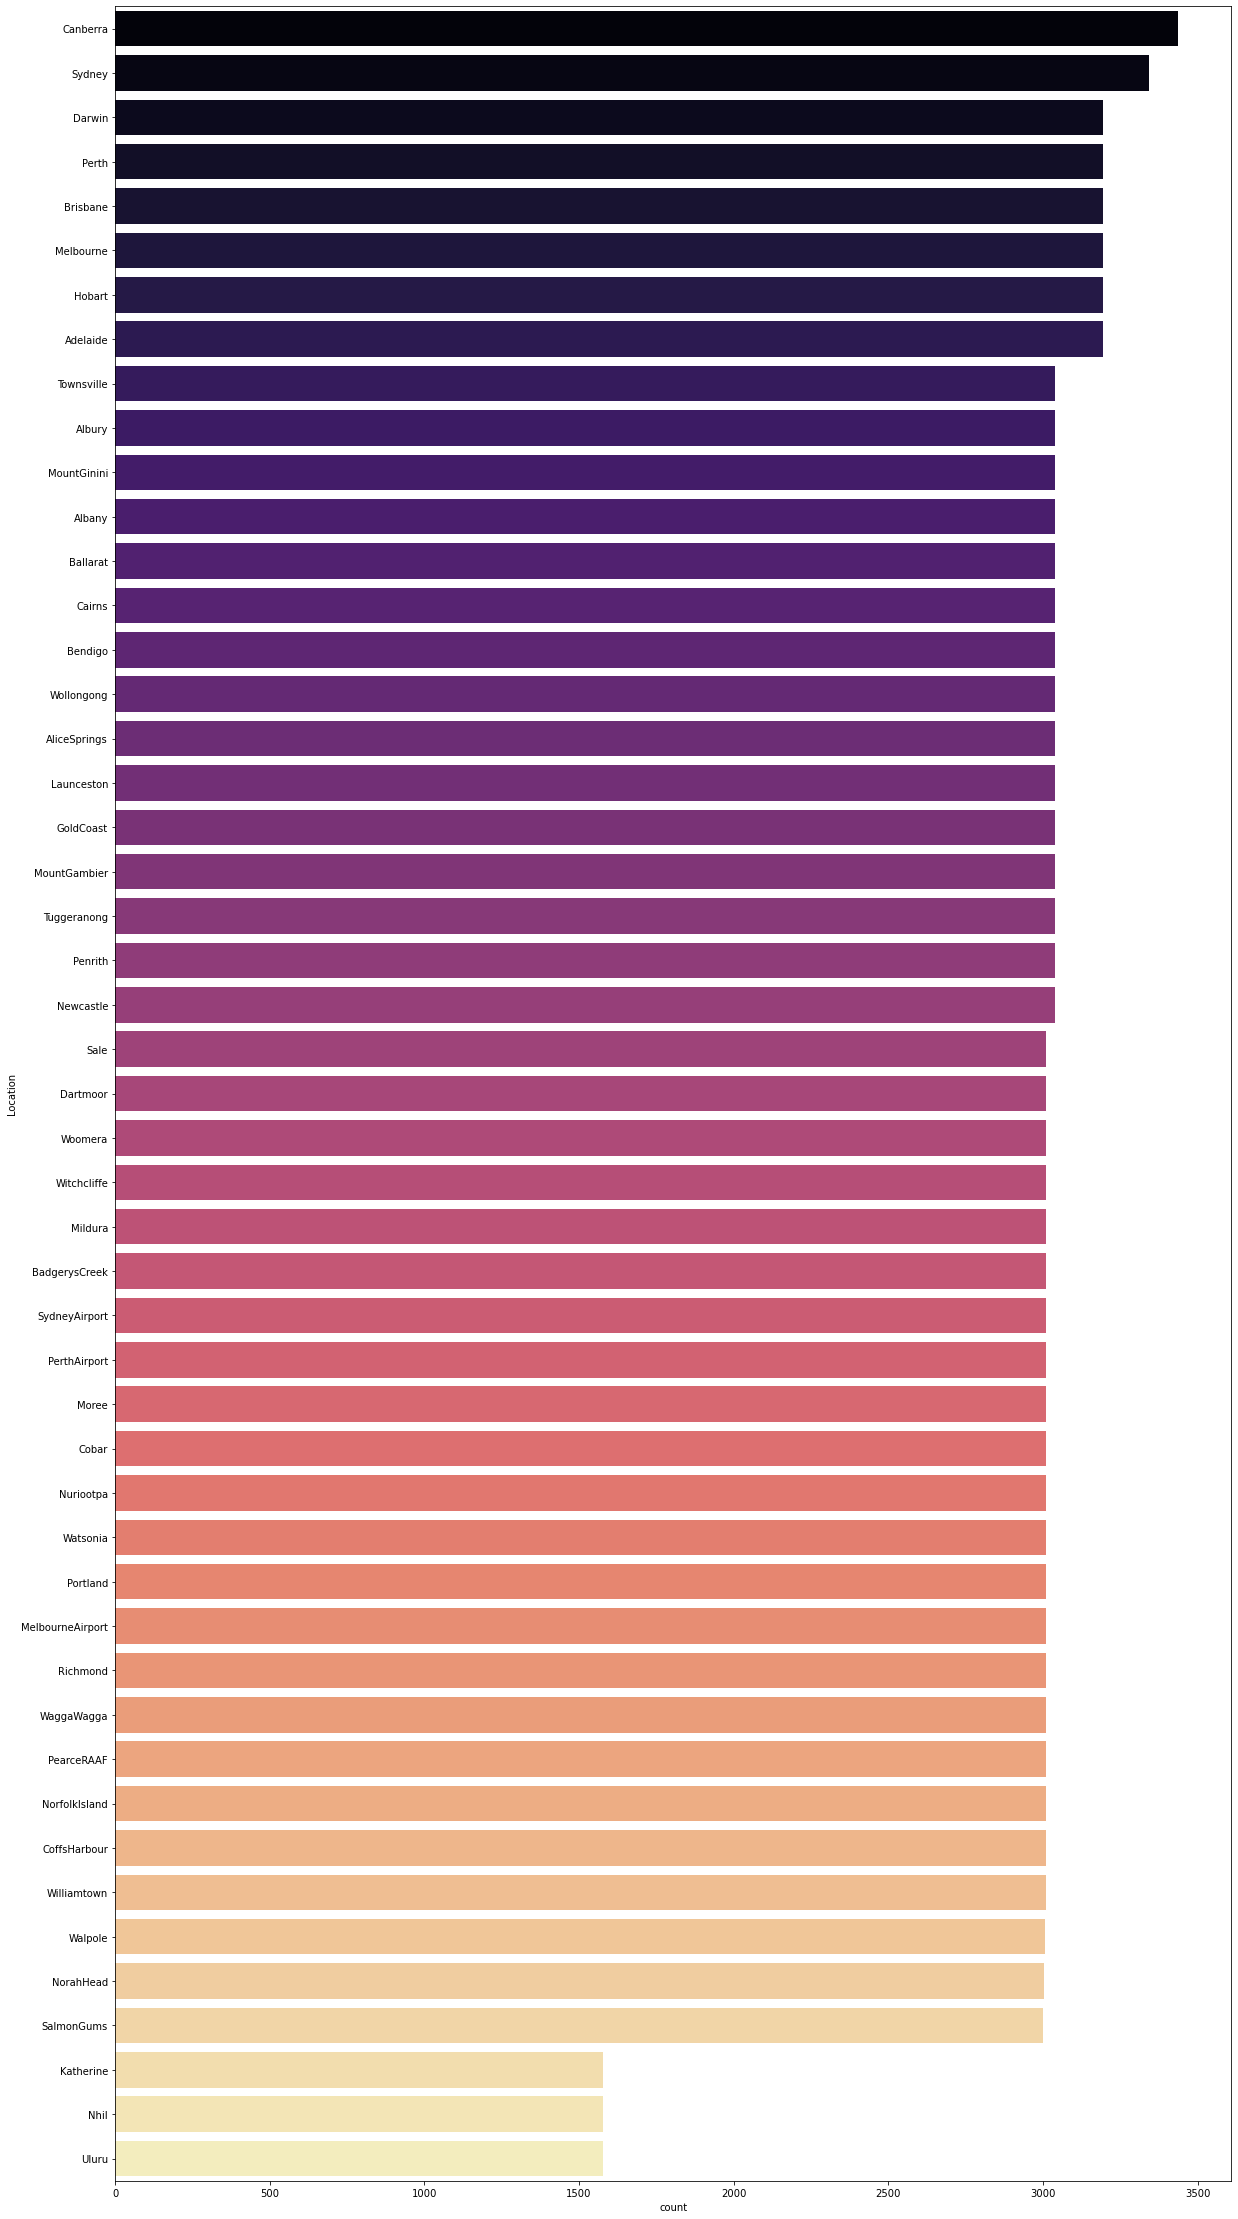

In [11]:
plt.figure(figsize=(20, 40))
sns.countplot(y="Location", data=data, palette = 'magma', order = data['Location'].value_counts().index)

In [12]:
data['Date'] = pd.to_datetime(data['Date'])

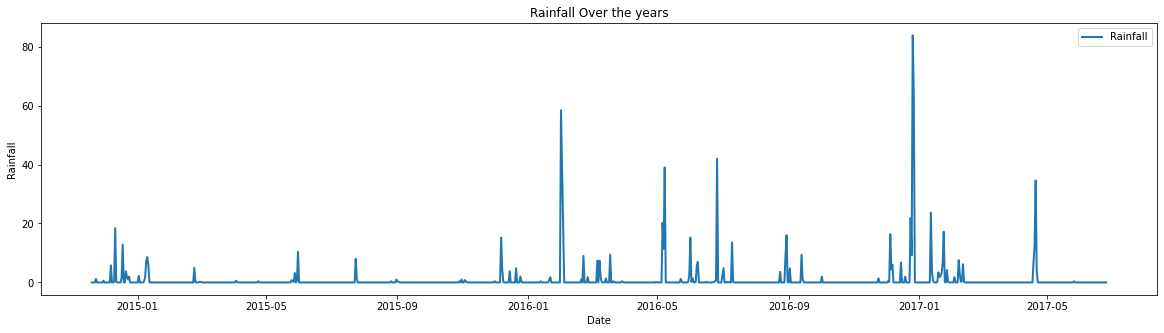

In [13]:
df_date = data.iloc[-950:,:]
plt.figure(figsize=(20,5))
sns.lineplot(x=df_date['Date'],y=df_date['Rainfall'],linewidth=2, label= 'Rainfall')
plt.title('Rainfall Over the years')
plt.show()

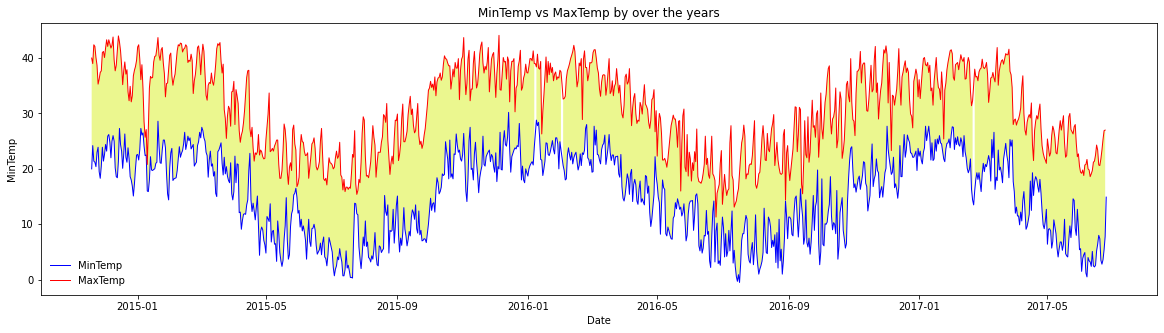

In [14]:
plt.figure(figsize=[20,5])
sns.lineplot(x=df_date['Date'],y=df_date['MinTemp'],color='blue',linewidth=1, label= 'MinTemp')
sns.lineplot(x=df_date['Date'],y=df_date['MaxTemp'],color='red',linewidth=1, label= 'MaxTemp')
plt.fill_between(df_date['Date'],df_date['MinTemp'],df_date['MaxTemp'], facecolor = '#EBF78F')
plt.title('MinTemp vs MaxTemp by over the years')
plt.legend(loc='lower left', frameon=False)
plt.show()

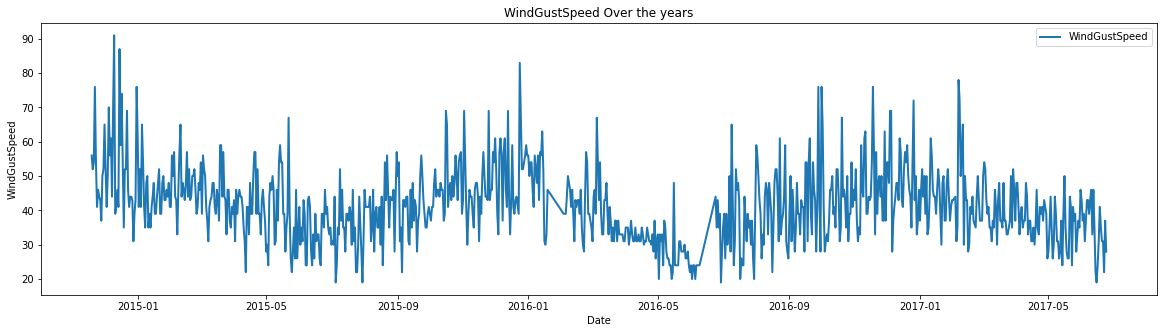

In [15]:
df_date = data.iloc[-950:,:]
plt.figure(figsize=(20,5))
sns.lineplot(x=df_date['Date'],y=df_date['WindGustSpeed'],linewidth=2, label= 'WindGustSpeed')
plt.title('WindGustSpeed Over the years')
plt.show()

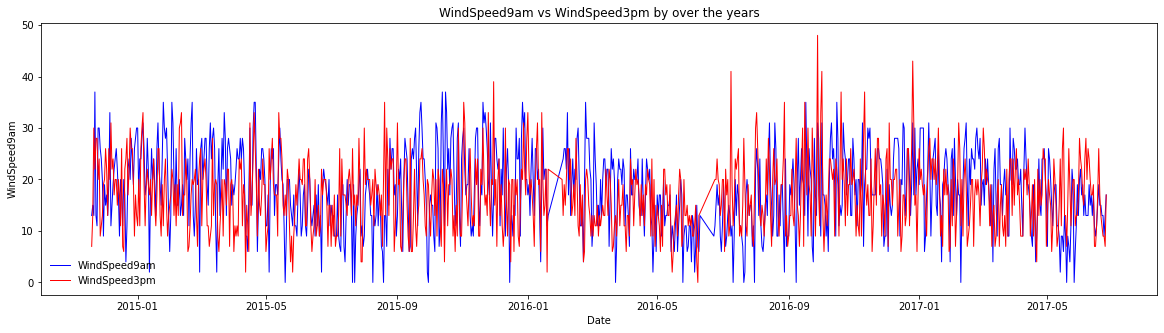

In [16]:
plt.figure(figsize=[20,5])
sns.lineplot(x=df_date['Date'],y=df_date['WindSpeed9am'],color='blue',linewidth=1, label= 'WindSpeed9am')
sns.lineplot(x=df_date['Date'],y=df_date['WindSpeed3pm'],color='red',linewidth=1, label= 'WindSpeed3pm')
plt.title('WindSpeed9am vs WindSpeed3pm by over the years')
plt.legend(loc='lower left', frameon=False)
plt.show()

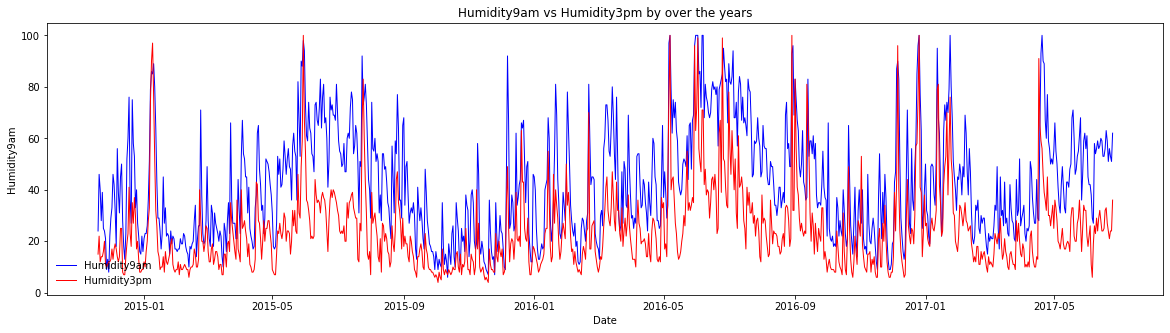

In [17]:
plt.figure(figsize=[20,5])
sns.lineplot(x=df_date['Date'],y=df_date['Humidity9am'],color='blue',linewidth=1, label= 'Humidity9am')
sns.lineplot(x=df_date['Date'],y=df_date['Humidity3pm'],color='red',linewidth=1, label= 'Humidity3pm')
plt.title('Humidity9am vs Humidity3pm by over the years')
plt.legend(loc='lower left', frameon=False)
plt.show()

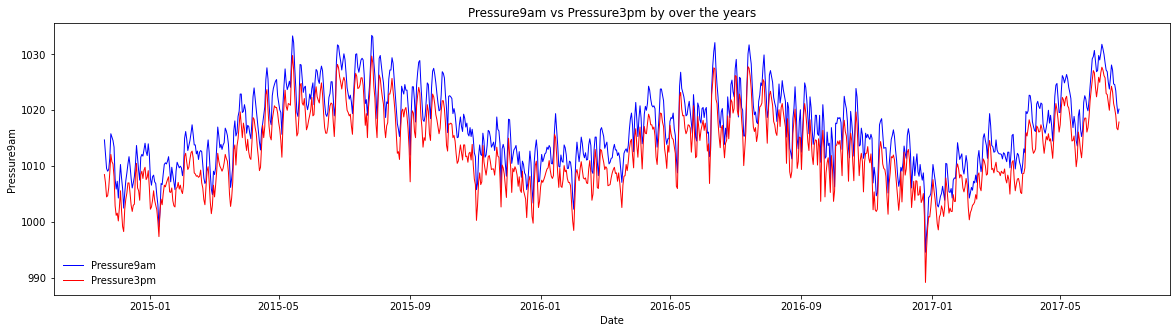

In [18]:
plt.figure(figsize=[20,5])
sns.lineplot(x=df_date['Date'],y=df_date['Pressure9am'],color='blue',linewidth=1, label= 'Pressure9am')
sns.lineplot(x=df_date['Date'],y=df_date['Pressure3pm'],color='red',linewidth=1, label= 'Pressure3pm')
plt.title('Pressure9am vs Pressure3pm by over the years')
plt.legend(loc='lower left', frameon=False)
plt.show()

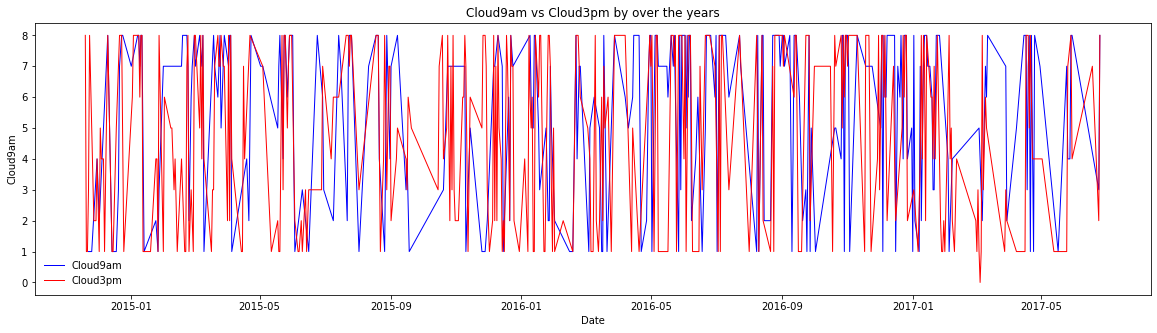

In [19]:
plt.figure(figsize=[20,5])
sns.lineplot(x=df_date['Date'],y=df_date['Cloud9am'],color='blue',linewidth=1, label= 'Cloud9am')
sns.lineplot(x=df_date['Date'],y=df_date['Cloud3pm'],color='red',linewidth=1, label= 'Cloud3pm')
plt.title('Cloud9am vs Cloud3pm by over the years')
plt.legend(loc='lower left', frameon=False)
plt.show()

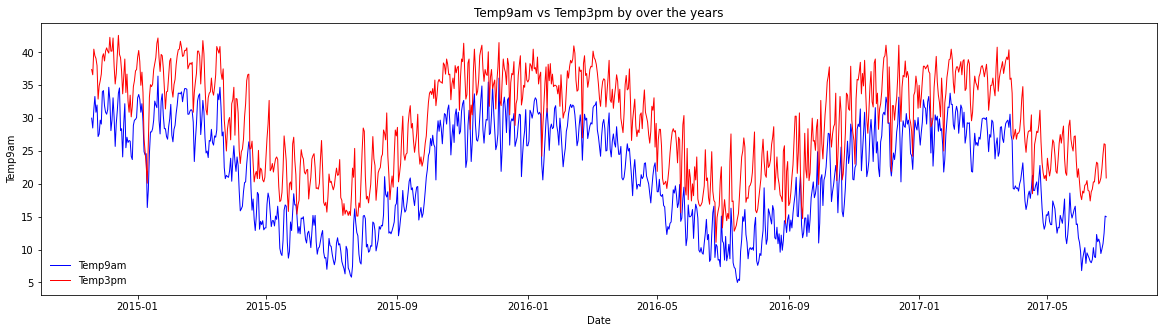

In [20]:
plt.figure(figsize=[20,5])
sns.lineplot(x=df_date['Date'],y=df_date['Temp9am'],color='blue',linewidth=1, label= 'Temp9am')
sns.lineplot(x=df_date['Date'],y=df_date['Temp3pm'],color='red',linewidth=1, label= 'Temp3pm')
plt.title('Temp9am vs Temp3pm by over the years')
plt.legend(loc='lower left', frameon=False)
plt.show()

In [21]:
grouped_df = data.groupby("Location").mean()

In [22]:
grouped_df.reset_index(inplace = True)

In [23]:
grouped_df.head()

Location    MinTemp    MaxTemp  Rainfall  Evaporation  Sunshine  \
0       Adelaide  12.579505  22.898934  1.566354     5.770364  7.747993   
1         Albany  12.948438  20.070998  2.263859     4.213345  6.657460   
2         Albury   9.530604  22.640872  1.914115          NaN       NaN   
3   AliceSprings  13.142284  29.248420  0.882850     9.026832  9.581944   
4  BadgerysCreek  11.131719  24.031208  2.193101          NaN       NaN   

   WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  \
0      36.499211      9.950125     15.471455    59.701066    44.828105   
1            NaN     12.503189     18.993498    74.805416    67.407917   
2      32.977394      8.211151     14.382965    74.070604    47.869393   
3      40.531281     14.727452     18.101053    39.690155    24.131466   
4      33.600409      8.051351     14.005404    76.895770    51.381855   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm    Temp9am    Temp3pm  
0  1018.764082  1016.803264       NaN       NaN  16.929046  21.557447  
1  1018.275721  1016.497280  5.191539  4.808072  16.236455  18.411555  
2  1018.369621  1015.760752  6.391001  5.406447  14.361135  21.373780  
3  1016.684732  1012.871913  2.845898  3.251213  21.335658  28.010764  
4  1018.461598  1015.635120       NaN       NaN  16.571698  22.522698

In [24]:
def barplotter(df):
    for col in df.drop('Location',axis=1):
        plt.figure(figsize=[50,5])
        sns.barplot(x=df['Location'],y=df[col], order=df.sort_values(col).Location, palette = 'Blues')
        plt.show()

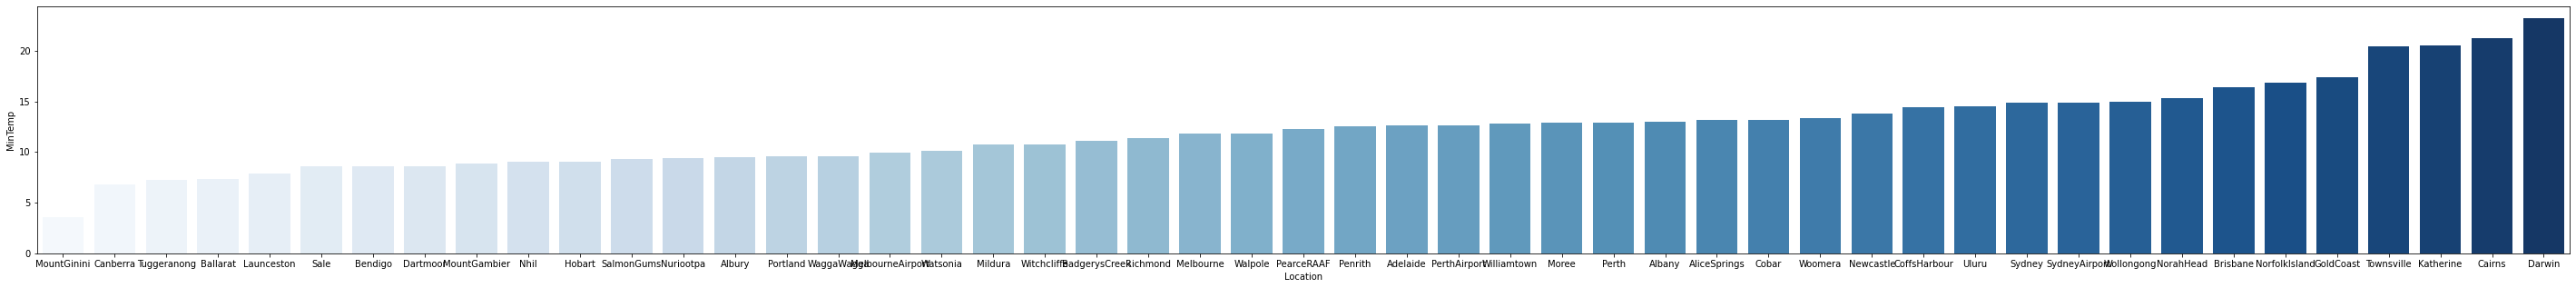

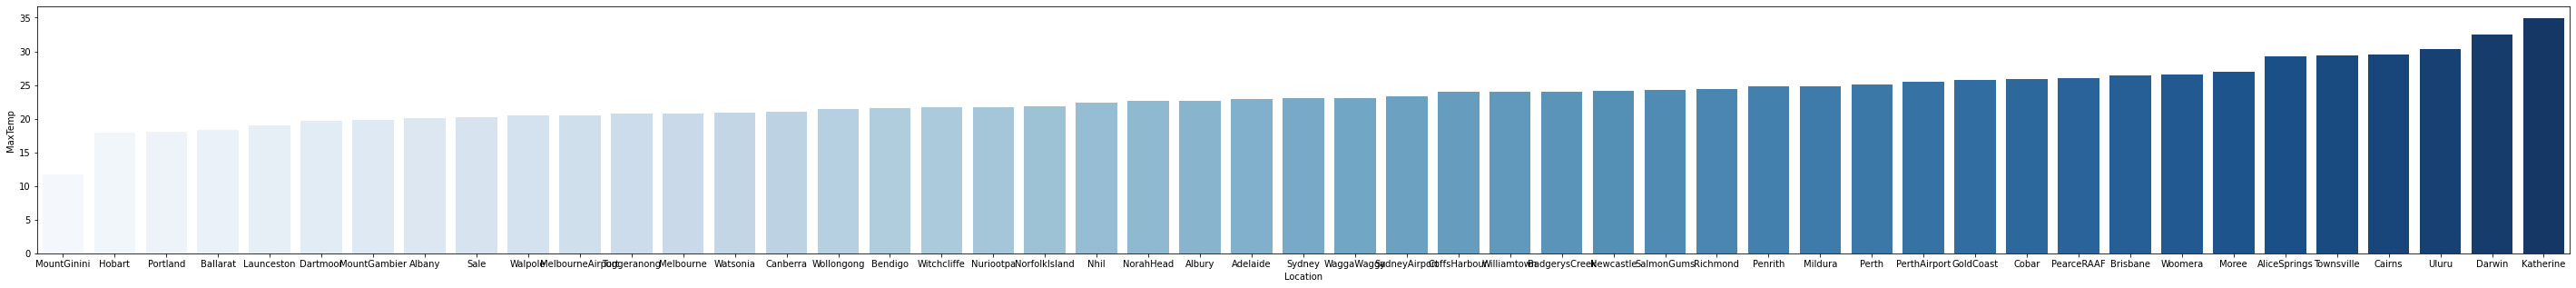

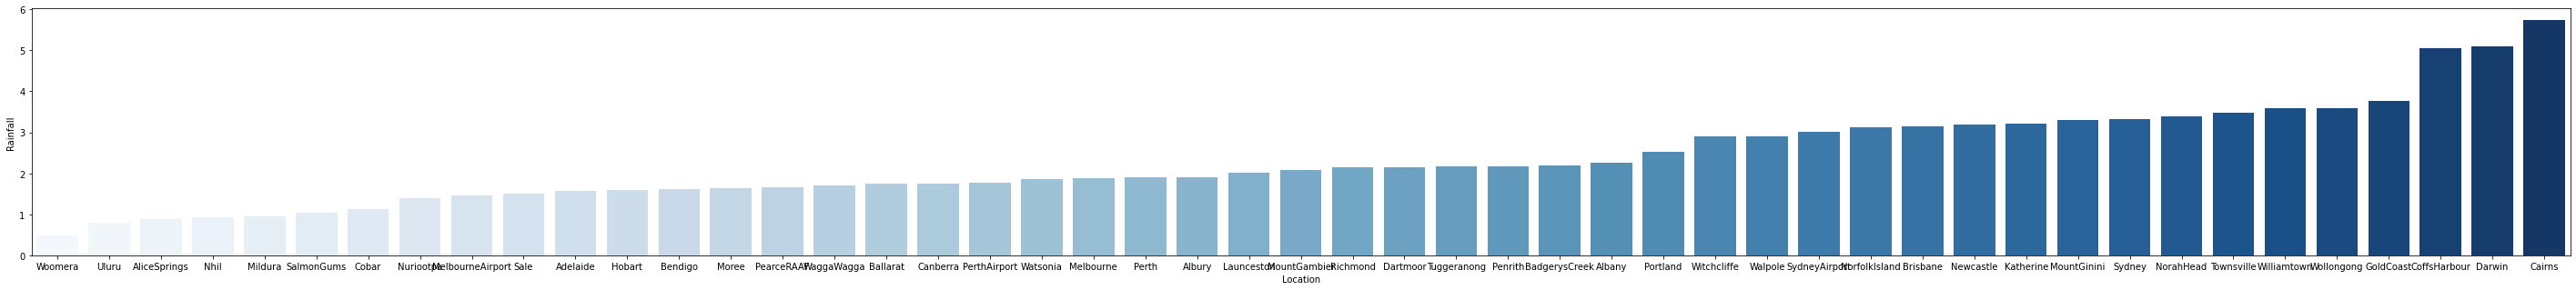

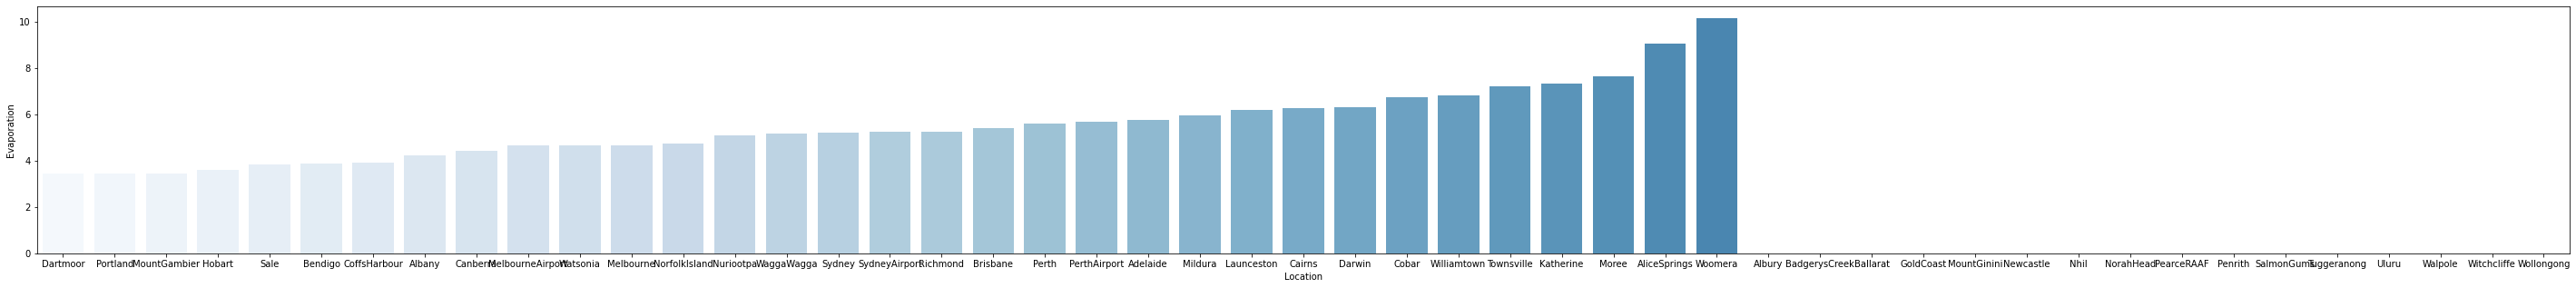

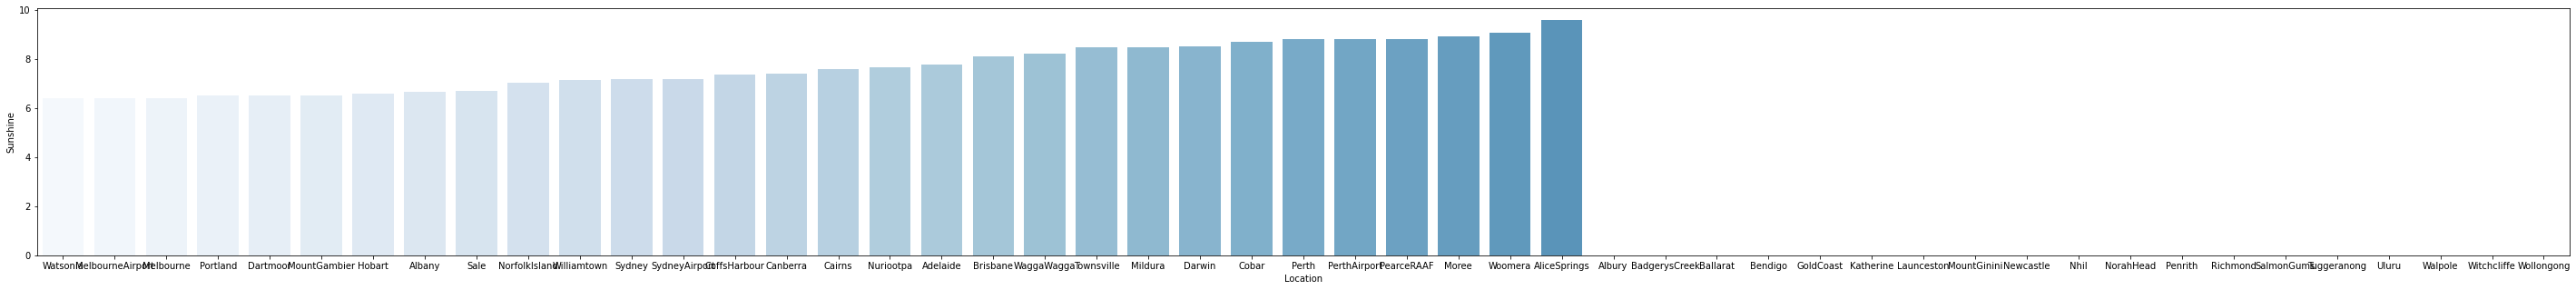

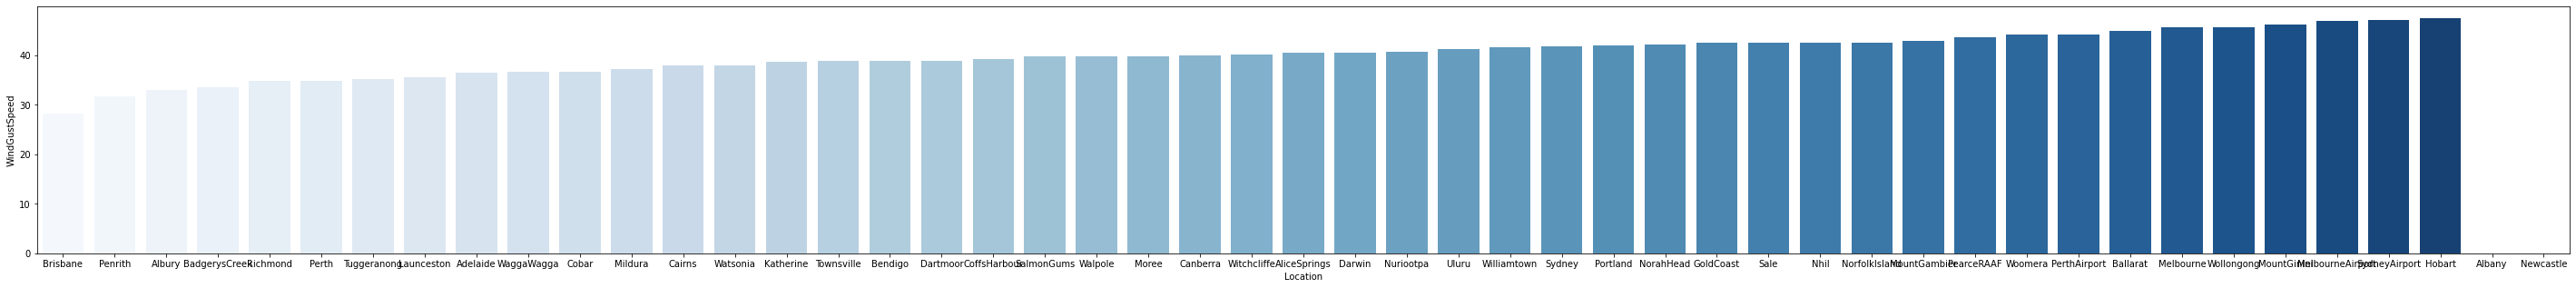

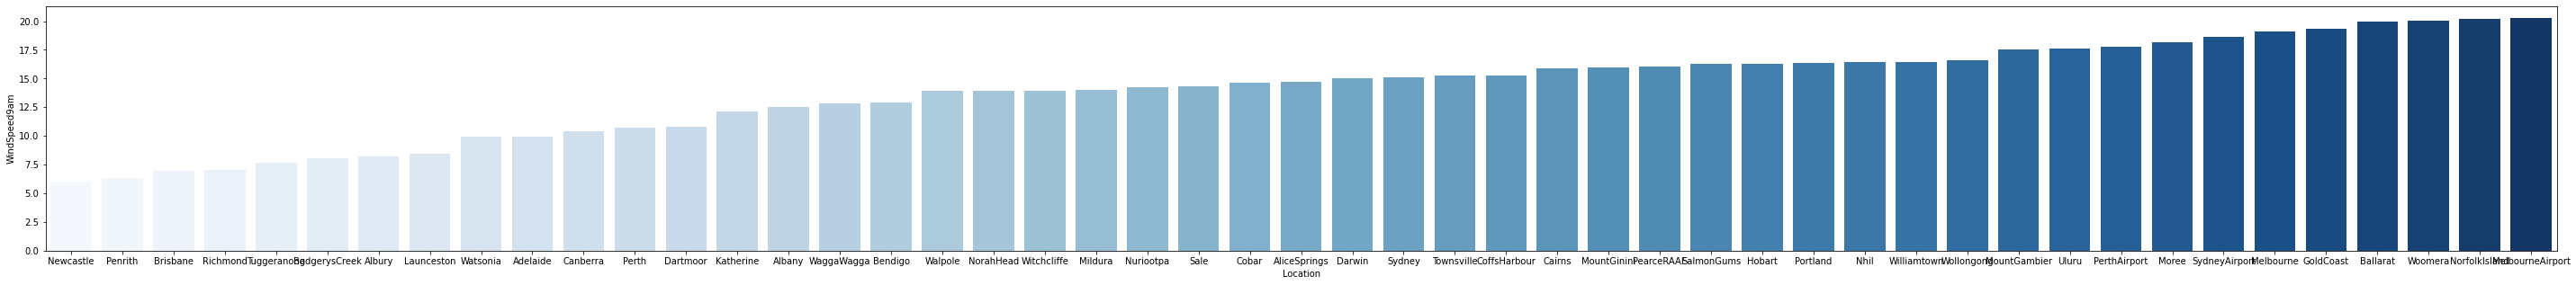

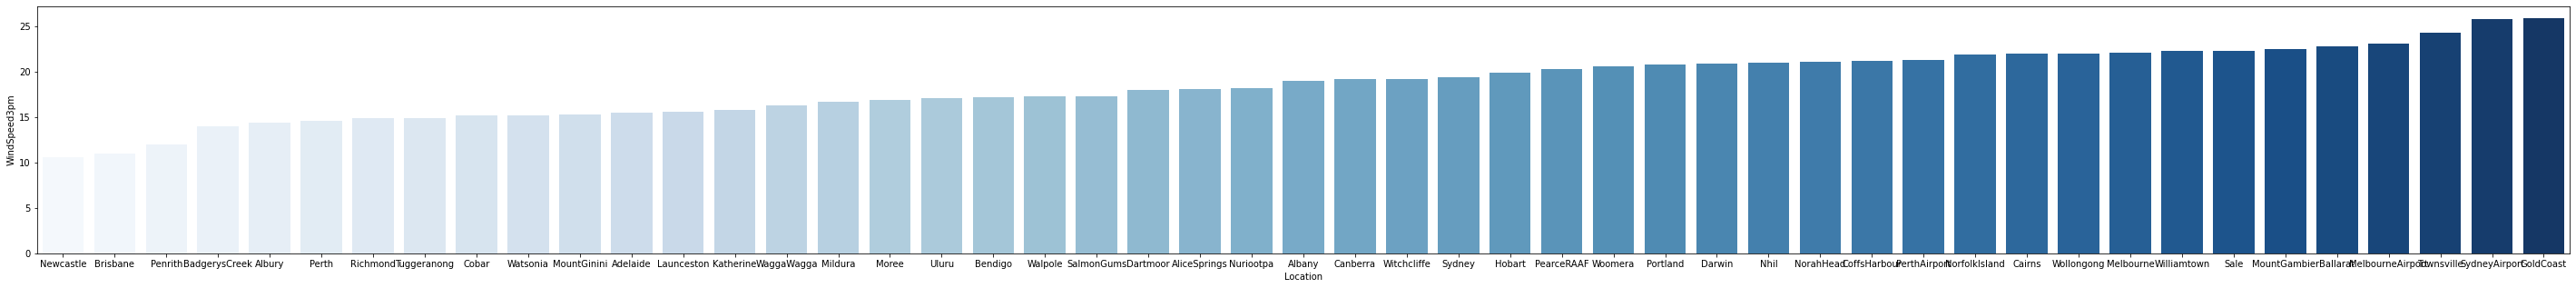

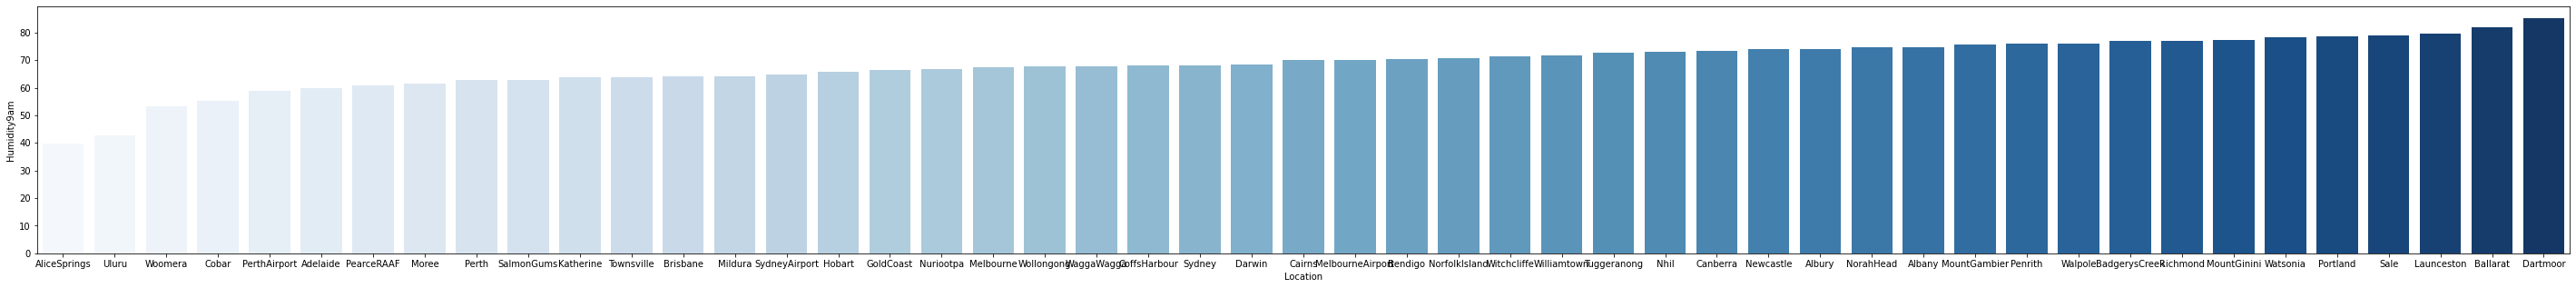

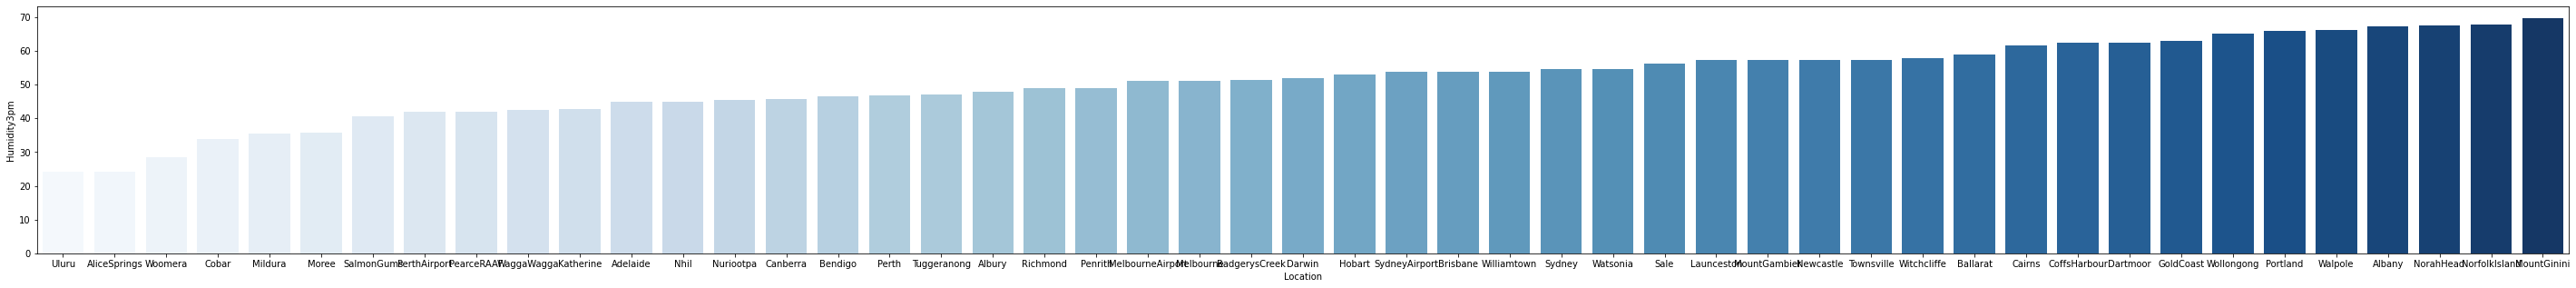

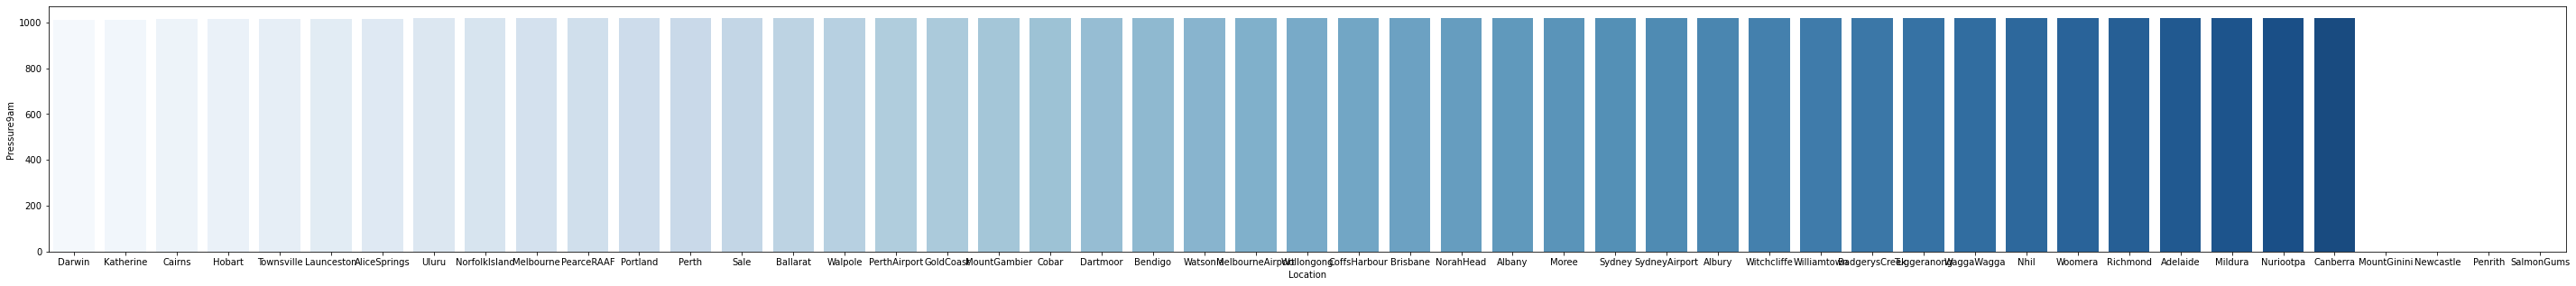

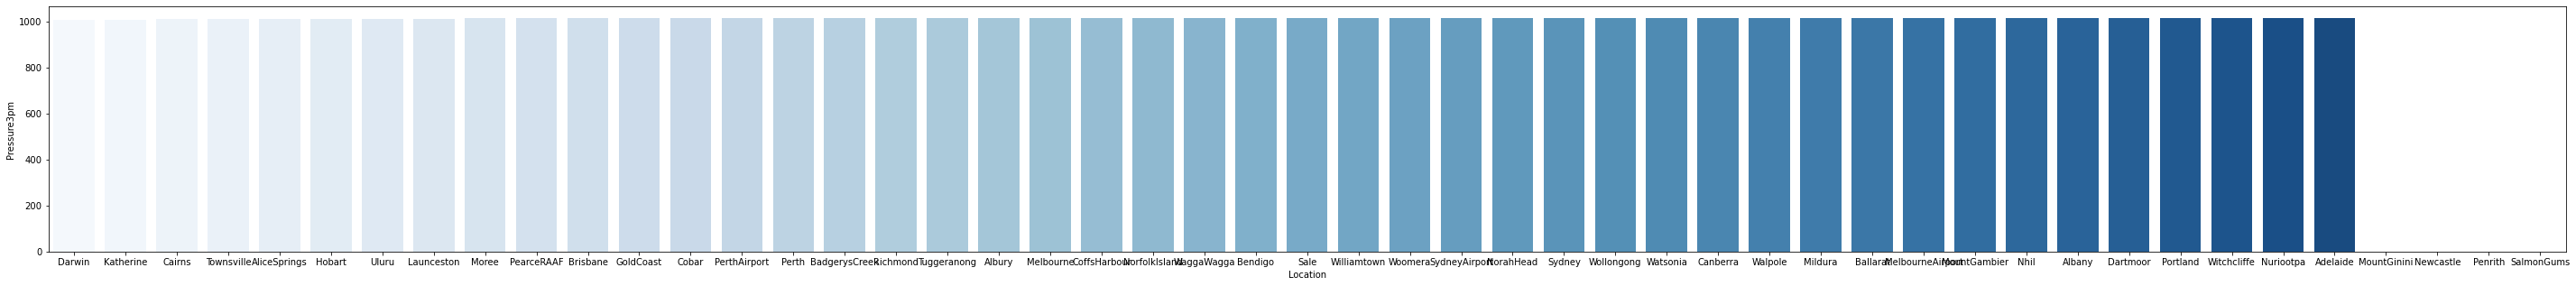

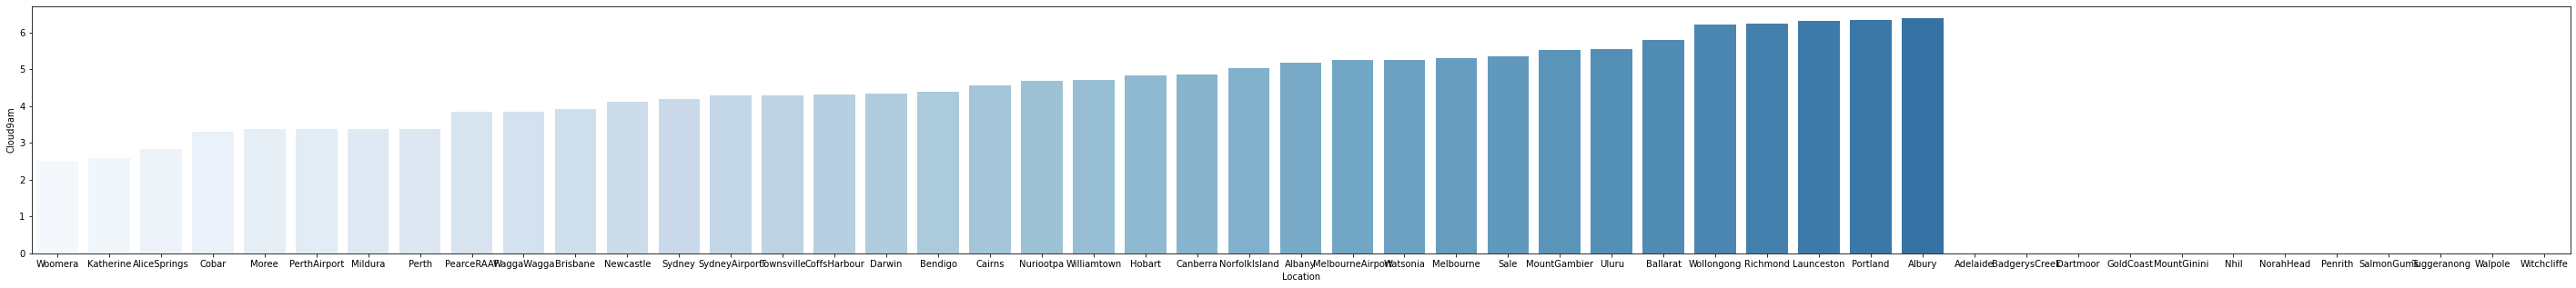

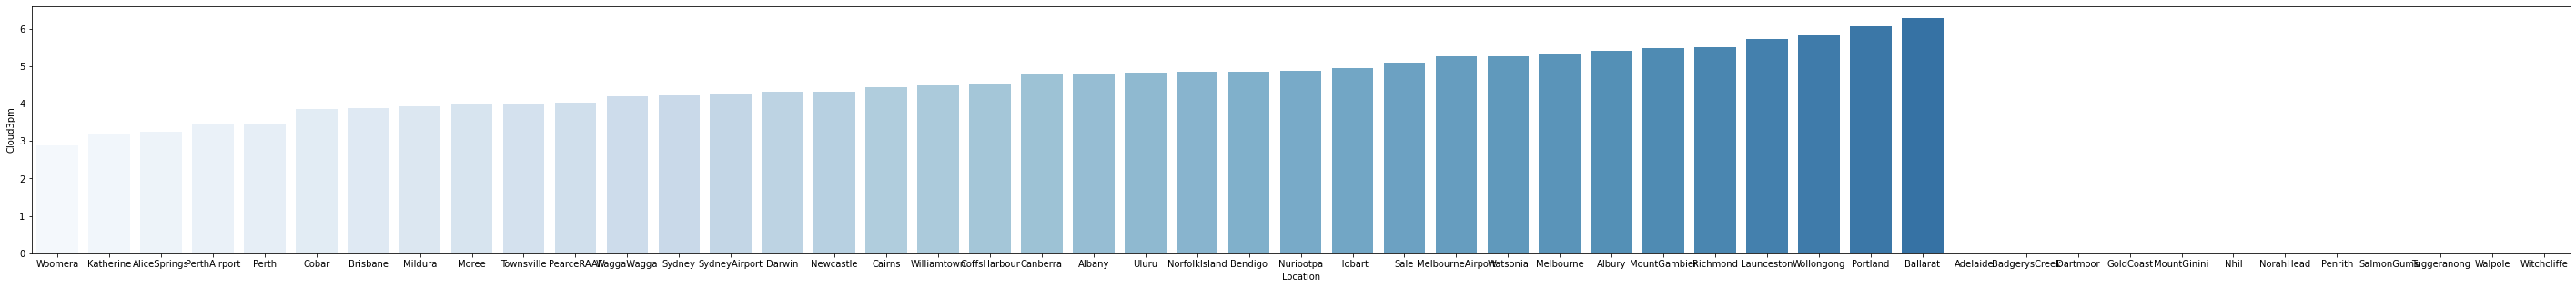

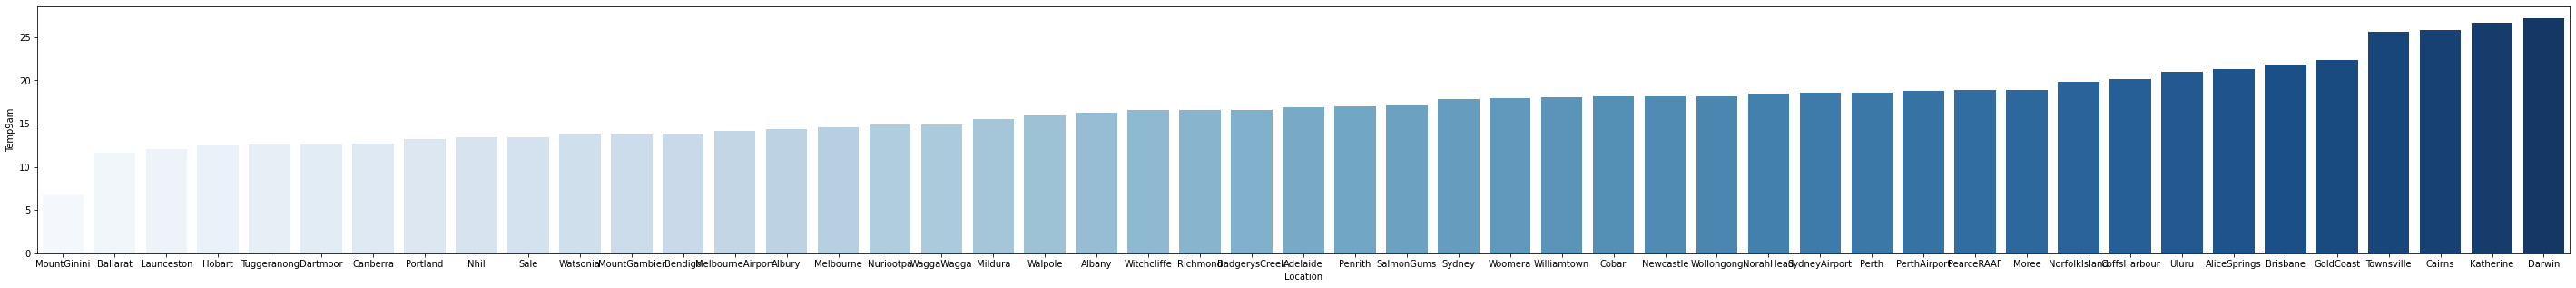

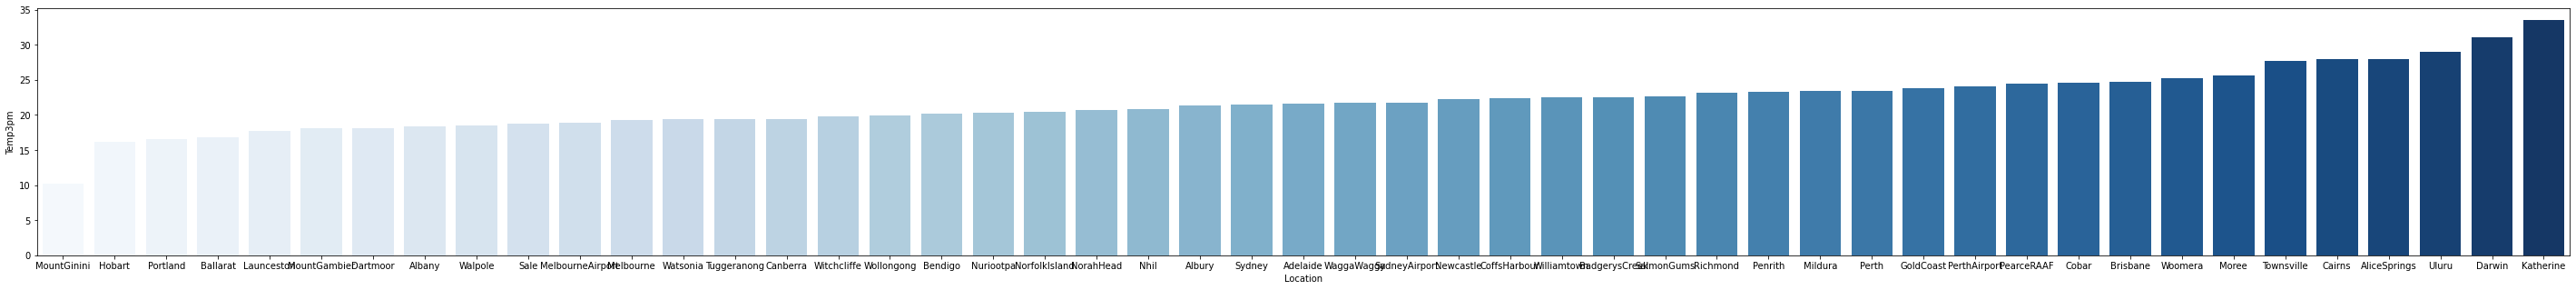

In [25]:
barplotter(grouped_df)

<AxesSubplot:>

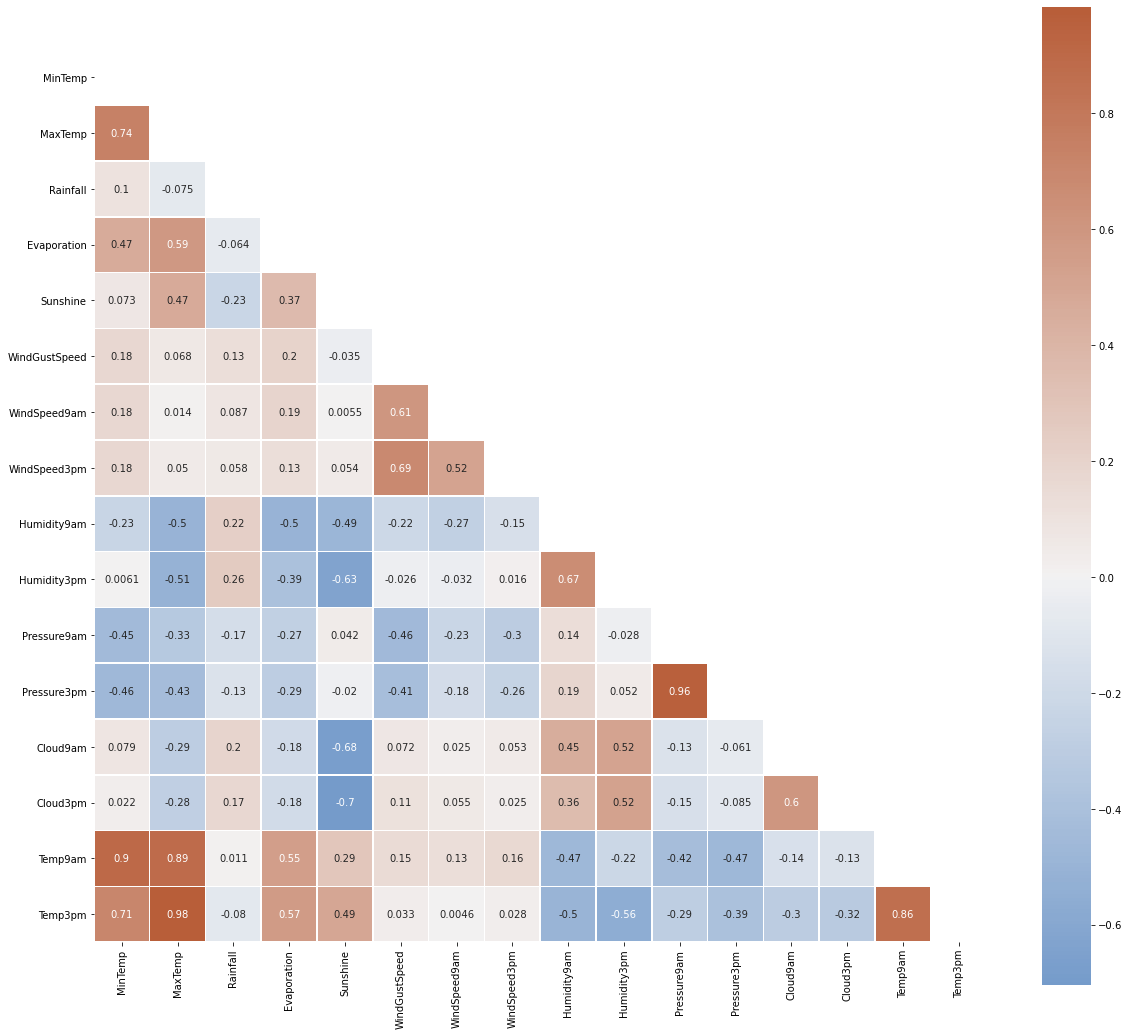

In [26]:
corr_df = data.corr()
mask = np.triu(np.ones_like(corr_df, dtype=bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(250, 25, as_cmap=True)
sns.heatmap(corr_df, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

In [27]:
clean_data = data.drop(['Sunshine','Evaporation', 'Cloud9am', 'Cloud3pm','Date'], axis = 1)

In [28]:
obj_cols = [col for col in clean_data.columns if clean_data[col].dtypes == 'O']
num_cols = [col for col in clean_data.columns if clean_data[col].dtypes != 'O']

In [29]:
for col in num_cols:
    median_val = clean_data[col].median()
    clean_data[col].fillna(median_val, inplace=True)   

In [30]:
for col in obj_cols:
    mode_val = clean_data[col].mode()[0]
    clean_data[col].fillna(mode_val, inplace=True)

In [31]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  object 
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   WindGustDir    145460 non-null  object 
 5   WindGustSpeed  145460 non-null  float64
 6   WindDir9am     145460 non-null  object 
 7   WindDir3pm     145460 non-null  object 
 8   WindSpeed9am   145460 non-null  float64
 9   WindSpeed3pm   145460 non-null  float64
 10  Humidity9am    145460 non-null  float64
 11  Humidity3pm    145460 non-null  float64
 12  Pressure9am    145460 non-null  float64
 13  Pressure3pm    145460 non-null  float64
 14  Temp9am        145460 non-null  float64
 15  Temp3pm        145460 non-null  float64
 16  RainToday      145460 non-null  object 
 17  RainTomorrow   145460 non-nul

In [32]:
clean_data_enc = clean_data
le =  LabelEncoder()
for col in obj_cols:
    clean_data_enc[col] = le.fit_transform(clean_data_enc[col])

In [33]:
clean_data_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       145460 non-null  int32  
 1   MinTemp        145460 non-null  float64
 2   MaxTemp        145460 non-null  float64
 3   Rainfall       145460 non-null  float64
 4   WindGustDir    145460 non-null  int32  
 5   WindGustSpeed  145460 non-null  float64
 6   WindDir9am     145460 non-null  int32  
 7   WindDir3pm     145460 non-null  int32  
 8   WindSpeed9am   145460 non-null  float64
 9   WindSpeed3pm   145460 non-null  float64
 10  Humidity9am    145460 non-null  float64
 11  Humidity3pm    145460 non-null  float64
 12  Pressure9am    145460 non-null  float64
 13  Pressure3pm    145460 non-null  float64
 14  Temp9am        145460 non-null  float64
 15  Temp3pm        145460 non-null  float64
 16  RainToday      145460 non-null  int32  
 17  RainTomorrow   145460 non-nul

In [34]:
scaler = MinMaxScaler()
cols = clean_data_enc.columns
clean_data_enc = scaler.fit_transform(clean_data_enc)
clean_data_enc = pd.DataFrame(clean_data_enc, columns=[cols])

In [35]:
clean_data_enc.head()

Location   MinTemp   MaxTemp  Rainfall WindGustDir WindGustSpeed  \
0  0.041667  0.516509  0.523629  0.001617    0.866667      0.294574   
1  0.041667  0.375000  0.565217  0.000000    0.933333      0.294574   
2  0.041667  0.504717  0.576560  0.000000    1.000000      0.310078   
3  0.041667  0.417453  0.620038  0.000000    0.266667      0.139535   
4  0.041667  0.613208  0.701323  0.002695    0.866667      0.271318   

  WindDir9am WindDir3pm WindSpeed9am WindSpeed3pm Humidity9am Humidity3pm  \
0   0.866667   0.933333     0.153846     0.275862        0.71        0.22   
1   0.400000   1.000000     0.030769     0.252874        0.44        0.25   
2   0.866667   1.000000     0.146154     0.298851        0.38        0.30   
3   0.600000   0.000000     0.084615     0.103448        0.45        0.16   
4   0.066667   0.466667     0.053846     0.229885        0.82        0.33   

  Pressure9am Pressure3pm   Temp9am   Temp3pm RainToday RainTomorrow  
0    0.449587      0.4800  0.508439  0.522073       0.0          0.0  
1    0.497521      0.4912  0.514768  0.570058       0.0          0.0  
2    0.447934      0.5056  0.594937  0.548944       0.0          0.0  
3    0.613223      0.5712  0.533755  0.612284       0.0          0.0  
4    0.500826      0.4624  0.527426  0.673704       0.0          0.0

In [36]:
X = clean_data_enc.drop(['RainTomorrow'], axis=1)
y = clean_data_enc['RainTomorrow']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=111)

In [37]:
seed=1
models = [
            'AdaBoostClassifier',
            'GradientBoostingClassifier',
            'RandomForestClassifier',
            'KNeighborsClassifier',
            'LogisticRegressionClassifier'
         ]
clfs = [
        AdaBoostClassifier(random_state=seed),
        GradientBoostingClassifier(random_state=seed),
        RandomForestClassifier(random_state=seed,n_jobs=-1),
        KNeighborsClassifier(n_jobs=-1),
        LogisticRegression(solver='newton-cg', multi_class='multinomial')
        ]
params = {
            models[0]:{'learning_rate':[0.01], 'n_estimators':[150]},
            models[1]:{'learning_rate':[0.01],'n_estimators':[100], 'max_depth':[3],
                       'min_samples_split':[2],'min_samples_leaf': [2]},
            models[2]:{'n_estimators':[100], 'criterion':['gini'],'min_samples_split':[2],
                      'min_samples_leaf': [4]},
            models[3]:{'n_neighbors':[5], 'weights':['distance'],'leaf_size':[15]},
            models[4]: {'C':[2000], 'tol': [0.0001]}
         }

In [38]:
for name, estimator in zip(models,clfs):
    print(name)
    clf = GridSearchCV(estimator, params[name], scoring='roc_auc', refit='True', n_jobs=-1, cv=5)
    clf.fit(X_train, y_train)

    print("best params: " + str(clf.best_params_))
    print("best scores: " + str(clf.best_score_))
    acc = accuracy_score(y_test, clf.predict(X_test))
    print("Accuracy: {:.4%}".format(acc))

AdaBoostClassifier
best params: {'learning_rate': 0.01, 'n_estimators': 150}
best scores: 0.8111687006538789
Accuracy: 82.6976%
GradientBoostingClassifier
best params: {'learning_rate': 0.01, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
best scores: 0.8334184110081061
Accuracy: 82.8516%
RandomForestClassifier
best params: {'criterion': 'gini', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
best scores: 0.8735204280606583
Accuracy: 85.3788%
KNeighborsClassifier
best params: {'leaf_size': 15, 'n_neighbors': 5, 'weights': 'distance'}
best scores: 0.8093942332761712
Accuracy: 83.4841%
LogisticRegressionClassifier
best params: {'C': 2000, 'tol': 0.0001}
best scores: 0.8494793467663188
Accuracy: 84.3118%


In [40]:
params= {'criterion': 'gini', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
model = RandomForestClassifier(**params)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred) 
print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc))
print(classification_report(y_test,y_pred,digits=5))

Accuracy = 0.8549429396397635
ROC Area under Curve = 0.7243739690516884
              precision    recall  f1-score   support

         0.0    0.86986   0.95732   0.91149     28374
         1.0    0.76431   0.49143   0.59822      7991

    accuracy                        0.85494     36365
   macro avg    0.81708   0.72437   0.75486     36365
weighted avg    0.84666   0.85494   0.84265     36365



In [42]:
def plot_roc_cur(fper, tper):  
    plt.plot(fper, tper, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

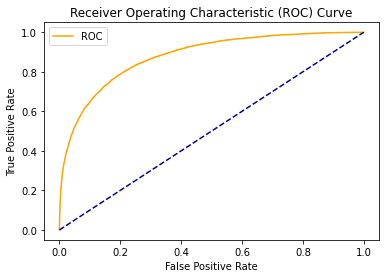

In [43]:
probs = model.predict_proba(X_test)  
probs = probs[:, 1]  
fper, tper, thresholds = roc_curve(y_test, probs) 
plot_roc_cur(fper, tper)

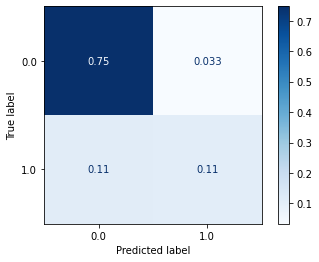

In [44]:
plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues, normalize = 'all')

In [47]:
filename = 'rainfall_prediction_model.sav'
pickle.dump(model, open(filename, 'wb'))